In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# import functions from sklearn to perform different clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# import functions from scipy to plot the dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# read excel data file using pandas
df_power = pd.read_excel('power.xlsx')

# head() to display top five rows
df_power.head()

# Note: To display more rows, example 10, use head(10)

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                2.242                  0.162   237.33              10.0   
1                3.714                  0.296   235.15              15.8   
2                3.212                  0.304   235.99              14.2   
3                3.694                  0.280   235.16              15.6   
4                3.204                  0.292   236.08              14.0   

   Kitchen_consumption  Laundry_consumption  Other_appliances_consumption  
0                    1                    7                            17  
1                    2                   35                            17  
2                    1                   26                            17  
3                    1                   35                            17  
4                    1                   27                            17

In [4]:
# 'shape' function gives the total number of rows and columns in the data
df_power.shape

(21240, 7)

**1. Check for the data type**

In [5]:
# 'dtypes' gives the datatype for each column
df_power.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Kitchen_consumption               int64
Laundry_consumption               int64
Other_appliances_consumption      int64
dtype: object

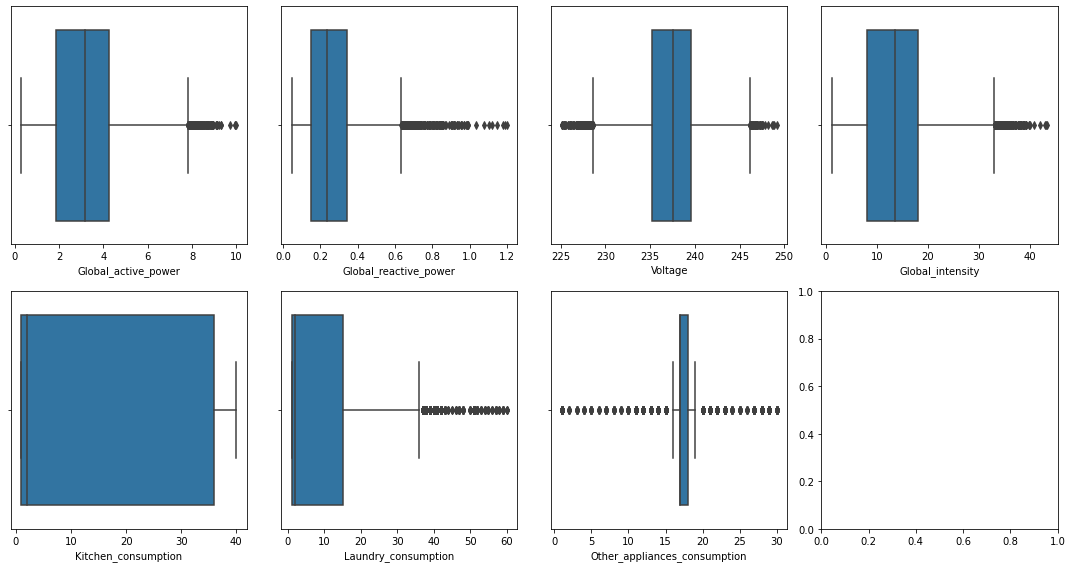

In [6]:
# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_power.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_power[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**1. Remove outliers by IQR method**

In [7]:
# calculate the first quartile
Q1 = df_power.quantile(0.25)

# calculate the third quartile
Q3 = df_power.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_power = df_power[~((df_power < (Q1 - 1.5 * IQR)) | (df_power > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df_power = df_power.reset_index(drop = True)

To confirm that the outliers have been removed; let us visualize the boxplot again.

**2. Plot the boxplot to recheck for outliers**

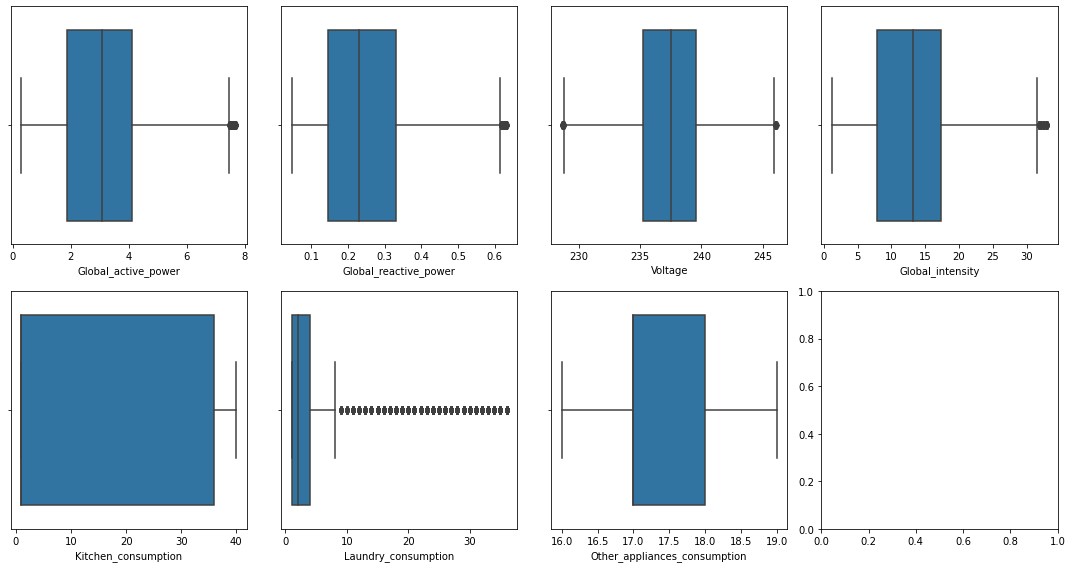

In [8]:
# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_power.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_power[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [9]:
# check the shape of the data after removal of outliers 
df_power.shape

(16724, 7)

In [10]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df_power.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         16724.000000           16724.000000  16724.000000   
mean              3.197480               0.249404    237.351591   
std               1.444141               0.132148      3.289317   
min               0.302000               0.046000    228.600000   
25%               1.858000               0.144000    235.220000   
50%               3.096000               0.230000    237.510000   
75%               4.100000               0.332000    239.520000   
max               7.716000               0.632000    246.150000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count      16724.000000         16724.000000         16724.000000   
mean          13.601495            13.151937             6.802141   
std            6.204866            16.384600            10.920451   
min            1.200000             1.000000             1.000000   
25%            7.800000             1.000000             1.000000   
50%           13.200000             1.000000             2.000000   
75%           17.400000            36.000000             4.000000   
max           33.000000            40.000000            36.000000   

       Other_appliances_consumption  
count                  16724.000000  
mean                      17.428426  
std                        0.705236  
min                       16.000000  
25%                       17.000000  
50%                       17.000000  
75%                       18.000000  
max                       19.000000

Let us plot the heatmap to visualize the missing values in the data.

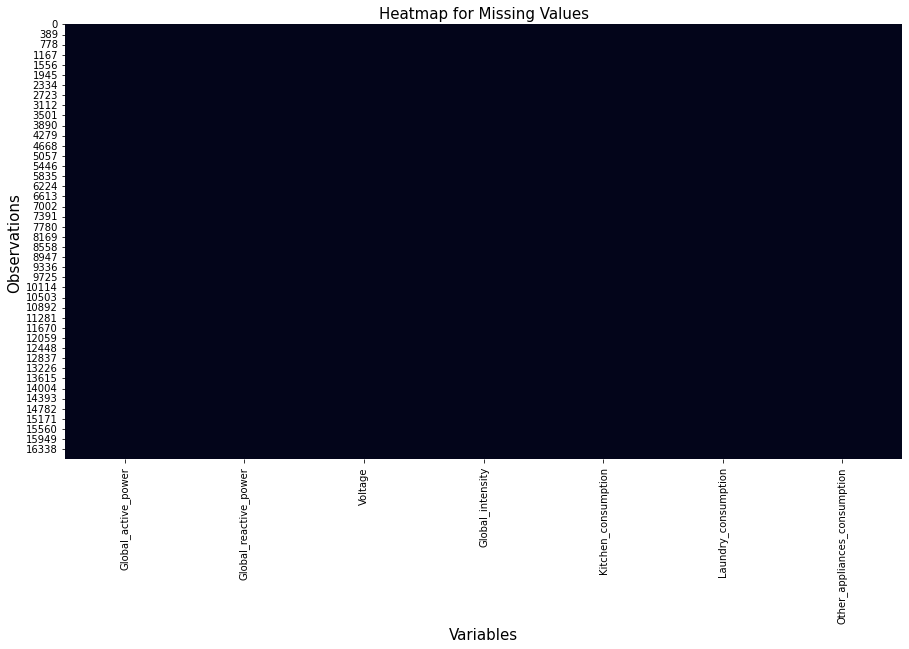

In [11]:
# plot heatmap to check null values
# the 'isnull()' returns the boolean output with value 'True' for the mising entry
# 'cbar = False' does not show the color axis 
sns.heatmap(df_power.isnull(), cbar=False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Observations', fontsize = 15)

# display the plot
plt.show()

In [12]:
# create a copy of the original dataset 
features = df_power.copy()

# head() to display top five rows
features.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                2.242                  0.162   237.33              10.0   
1                3.714                  0.296   235.15              15.8   
2                3.212                  0.304   235.99              14.2   
3                3.694                  0.280   235.16              15.6   
4                3.204                  0.292   236.08              14.0   

   Kitchen_consumption  Laundry_consumption  Other_appliances_consumption  
0                    1                    7                            17  
1                    2                   35                            17  
2                    1                   26                            17  
3                    1                   35                            17  
4                    1                   27                            17

In [13]:
# instantiate the 'StandardScaler()'
scaler = StandardScaler()

# fit the scaler on 'features' and transform the data 
features = scaler.fit_transform(features)     

# create a dataframe of the scaled features 
# pass the required column names to the parameter 'columns'
features_scaled = pd.DataFrame(features, columns = df_power.columns)
                               
# head() to display top five rows
features_scaled.head()

Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0            -0.661645              -0.661430 -0.006564         -0.580448   
1             0.357676               0.352612 -0.669335          0.354330   
2             0.010054               0.413151 -0.413956          0.096460   
3             0.343827               0.231532 -0.666295          0.322096   
4             0.004515               0.322342 -0.386593          0.064227   

   Kitchen_consumption  Laundry_consumption  Other_appliances_consumption  
0            -0.741690             0.018119                     -0.607511  
1            -0.680656             2.582192                     -0.607511  
2            -0.741690             1.758026                     -0.607511  
3            -0.741690             2.582192                     -0.607511  
4            -0.741690             1.849600                     -0.607511

In [14]:
# create several cluster combinations ranging from 1 to 7 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

Let us plot the elbow plot and identify the elbow point.

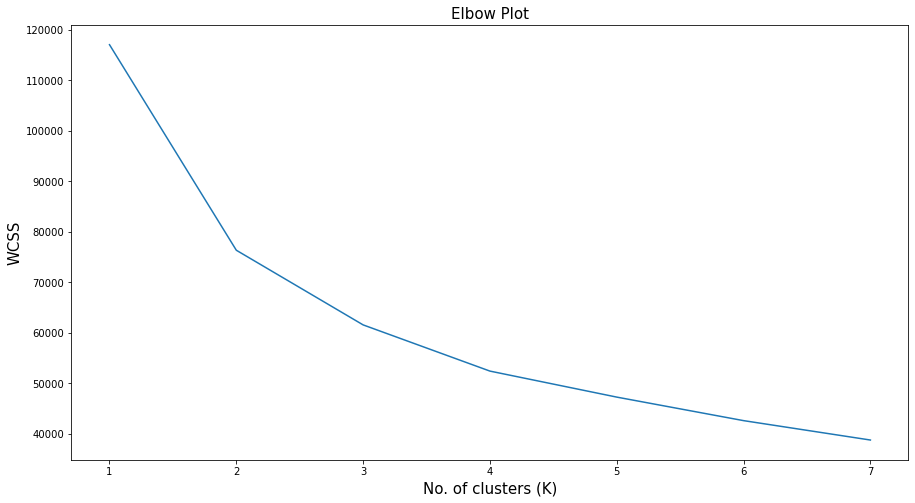

In [15]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,8), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

Since the elbow point is not clearly visible, we can also use the `KneeLocator()` from the 'kneed' library in python. This function returns the point of maximum curvature (i.e. elbow/knee point).

In [49]:
# import the 'KneeLocator' 
from kneed.knee_locator import KneeLocator

# pass the number of clusters and corresponding WCSS to parameters 'x' and 'y' respectively
# pass the type of the curve to the parameter 'curve'
# pass the direction of the data points to the parameter 'direction' 
k = KneeLocator(x  = range(1,8), y = wcss, curve = 'convex', direction = 'decreasing')

# 'elbow' returns the corresponding x-axis value at the maximum curvature 
k.elbow

3

In [18]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 7]

# use 'for' loop to build the clusters with different K
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
for K in n_clusters :
    cluster = KMeans (n_clusters = K, random_state = 10)
    predict = cluster.fit_predict(features_scaled)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # pass the scaled data and predicted labels to the 'silhouette_score()'
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.3285439939591319)
For n_clusters = 3, silhouette score is 0.34162545859561044)
For n_clusters = 4, silhouette score is 0.2783093083068228)
For n_clusters = 5, silhouette score is 0.2872087661116924)
For n_clusters = 6, silhouette score is 0.27428917764463195)
For n_clusters = 7, silhouette score is 0.2634628924611293)


Let us group the dataset into 3 clusters and check the number of elements in each cluster.

In [19]:
# build a K-Means model for K = 3
# pass the 'random_state' to obtain the same centroid initialization for each code run
K_model = KMeans(n_clusters= 3, random_state= 10)

# fit the model on the scaled data
K_model.fit(features_scaled)

KMeans(n_clusters=3, random_state=10)

In [20]:
# add a column 'Kmeans_label' to the original dataframe
# the 'labels_' returns the cluster number for each observation
df_power['Kmeans_label'] = K_model.labels_

# use the 'head()' to display top five rows
df_power.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                2.242                  0.162   237.33              10.0   
1                3.714                  0.296   235.15              15.8   
2                3.212                  0.304   235.99              14.2   
3                3.694                  0.280   235.16              15.6   
4                3.204                  0.292   236.08              14.0   

   Kitchen_consumption  Laundry_consumption  Other_appliances_consumption  \
0                    1                    7                            17   
1                    2                   35                            17   
2                    1                   26                            17   
3                    1                   35                            17   
4                    1                   27                            17   

   Kmeans_label  
0             0  
1             2  
2             2  
3             2  
4             2

#### Check the size of each cluster

In [21]:
# the 'unique()' returns the number of distinct clusters
# the 'return_counts = True' gives the number observation in each cluster
np.unique(K_model.labels_, return_counts=True)                

(array([0, 1, 2]), array([9040, 5052, 2632], dtype=int64))

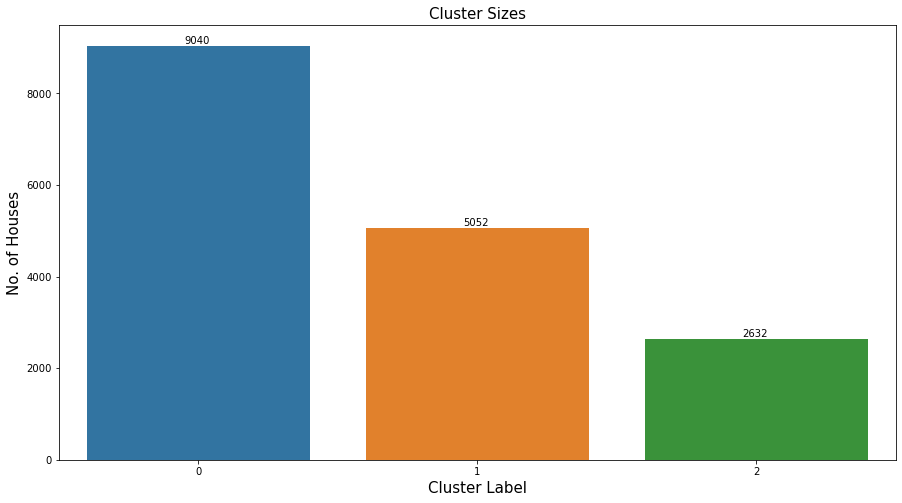

In [22]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_power, x = 'Kmeans_label')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Cluster Label', fontsize = 15)
plt.ylabel('No. of Houses', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y = np.unique(K_model.labels_, return_counts=True)[1][0] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][0])

plt.text(x = 0.95, y = np.unique(K_model.labels_, return_counts=True)[1][1] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][1])

plt.text(x = 1.95, y = np.unique(K_model.labels_, return_counts=True)[1][2] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][2])

# display the plot
plt.show()

In [23]:
# form a dataframe containing cluster centers
# the 'cluster_centers_' returns the co-ordinates of the center of each cluster 
centers = pd.DataFrame(K_model.cluster_centers_, columns =  (df_power.drop('Kmeans_label', axis=1)).columns)      

# display the cluster centers
centers

Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0            -0.752356              -0.074582  0.437979         -0.752492   
1             0.731003               0.148562 -0.424762          0.724348   
2             1.180954              -0.028994 -0.688994          1.194195   

   Kitchen_consumption  Laundry_consumption  Other_appliances_consumption  
0            -0.692633            -0.376804                      0.323291  
1             1.249091            -0.430561                     -0.293989  
2            -0.018619             2.120634                     -0.546093

In [24]:
# the 'scaler' is the standard scaler fitted on the original data
# use 'inverse_transform()' to get the cluster centers for the original (unscaled) data
# pass the scaled cluster centers to apply inverse transformation
# create a dataframe of these cluster centers
# pass the required column names to the parameter, 'columns'
unscaled_centers = pd.DataFrame(scaler.inverse_transform(K_model.cluster_centers_), 
                                columns =  (df_power.drop('Kmeans_label', axis=1)).columns)      

# display the dataframe
unscaled_centers

Global_active_power  Global_reactive_power     Voltage  Global_intensity  \
0             2.111005               0.239549  238.792199          8.932522   
1             4.253120               0.269036  235.954456         18.095843   
2             4.902894               0.245573  235.085338         21.011094   

   Kitchen_consumption  Laundry_consumption  Other_appliances_consumption  
0             1.803761             2.687389                     17.656416  
1            33.617181             2.100356                     17.221101  
2            12.846884            29.959726                     17.043313

<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above dataframe represents the cluster centers with respect to the original (unscaled) data. Let us consider the center of the second cluster: <br><br>
                    1. The average global active power of the houses in this cluster is 2.1112 KW. <br>
                    2. The average global reactive power of the houses in this cluster is 0.2396 KW.<br>
                    3. The average voltage of the houses in this cluster is 238.7924 volt.<br>
                    4. The average  global intensity of the houses in this cluster is 8.9337 ampere.<br>
                    5. On average, kitchen appliances in these houses consume 1.8035 watt-hours of power.<br>
                    6. On average, the laundry appliances in these houses consume 2.6923 watt-hours of power.<br>
                    7. On average, the other appliances in these houses consume 17.6563 watt-hours of power.</b>
              </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Kmeans_label == 0].describe()

Global_active_power  Global_reactive_power      Voltage  \
count          9040.000000            9040.000000  9040.000000   
mean              2.111005               0.239549   238.792199   
std               0.666097               0.124968     2.841714   
min               0.302000               0.046000   228.950000   
25%               1.568000               0.138000   237.050000   
50%               1.928000               0.222000   238.805000   
75%               2.590000               0.316000   240.650000   
max               5.100000               0.632000   246.150000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count       9040.000000          9040.000000          9040.000000   
mean           8.932522             1.803761             2.687389   
std            2.852371             2.909177             4.551053   
min            1.200000             1.000000             1.000000   
25%            6.600000             1.000000             1.000000   
50%            8.200000             1.000000             1.000000   
75%           11.000000             1.000000             2.000000   
max           21.400000            30.000000            33.000000   

       Other_appliances_consumption  Kmeans_label  
count                   9040.000000        9040.0  
mean                      17.656416           0.0  
std                        0.658443           0.0  
min                       16.000000           0.0  
25%                       17.000000           0.0  
50%                       18.000000           0.0  
75%                       18.000000           0.0  
max                       19.000000           0.0

**Compute the statistical summary of the observations in the 2nd cluster.**

In [26]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Kmeans_label == 1].describe()

Global_active_power  Global_reactive_power      Voltage  \
count          5052.000000            5052.000000  5052.000000   
mean              4.253120               0.269036   235.954456   
std               0.730371               0.141021     2.869831   
min               2.170000               0.046000   228.620000   
25%               3.731500               0.162000   234.130000   
50%               4.065000               0.252000   236.160000   
75%               4.684500               0.368000   237.860000   
max               7.698000               0.632000   245.010000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count       5052.000000          5052.000000          5052.000000   
mean          18.095843            33.617181             2.100356   
std            3.115066             9.483615             2.864460   
min           10.200000             1.000000             1.000000   
25%           15.800000            36.000000             1.000000   
50%           17.200000            37.000000             1.000000   
75%           20.000000            38.000000             2.000000   
max           32.800000            40.000000            22.000000   

       Other_appliances_consumption  Kmeans_label  
count                   5052.000000        5052.0  
mean                      17.221101           1.0  
std                        0.663264           0.0  
min                       16.000000           1.0  
25%                       17.000000           1.0  
50%                       17.000000           1.0  
75%                       18.000000           1.0  
max                       19.000000           1.0

In [27]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Kmeans_label == 2].describe()

Global_active_power  Global_reactive_power      Voltage  \
count          2632.000000            2632.000000  2632.000000   
mean              4.902894               0.245573   235.085338   
std               1.265837               0.134455     3.033034   
min               2.404000               0.046000   228.600000   
25%               3.766000               0.134000   232.830000   
50%               4.895000               0.228000   235.120000   
75%               5.868000               0.328000   237.150000   
max               7.716000               0.626000   245.050000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count       2632.000000          2632.000000          2632.000000   
mean          21.011094            12.846884            29.959726   
std            5.433421            16.055980             5.830748   
min           10.600000             1.000000             5.000000   
25%           16.000000             1.000000            26.000000   
50%           21.000000             1.000000            31.000000   
75%           25.050000            36.000000            35.000000   
max           33.000000            40.000000            36.000000   

       Other_appliances_consumption  Kmeans_label  
count                   2632.000000        2632.0  
mean                      17.043313           2.0  
std                        0.646325           0.0  
min                       16.000000           2.0  
25%                       17.000000           2.0  
50%                       17.000000           2.0  
75%                       17.000000           2.0  
max                       19.000000           2.0

In [28]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[ 5946.          5947.             0.00138495     2.        ]
 [13128.         13129.             0.00138495     2.        ]
 [13905.         13908.             0.00138495     2.        ]
 [12811.         12813.             0.0027699      2.        ]
 [ 1057.          1060.             0.00304024     2.        ]
 [ 7058.          7062.             0.00304024     2.        ]
 [ 5164.          5167.             0.00304024     2.        ]
 [ 6752.          6753.             0.00304024     2.        ]
 [12130.         12132.             0.00304024     2.        ]
 [ 8754.          8757.             0.00304024     2.        ]]


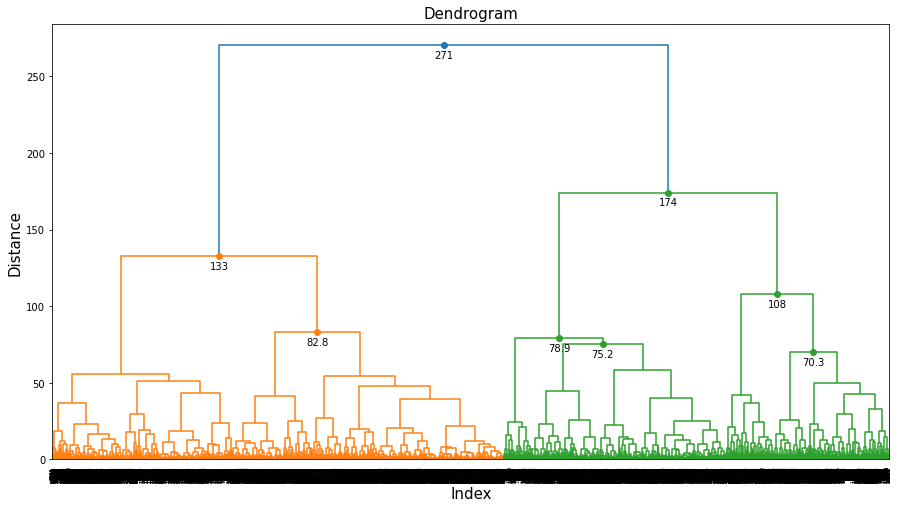

In [29]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 60
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 60:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

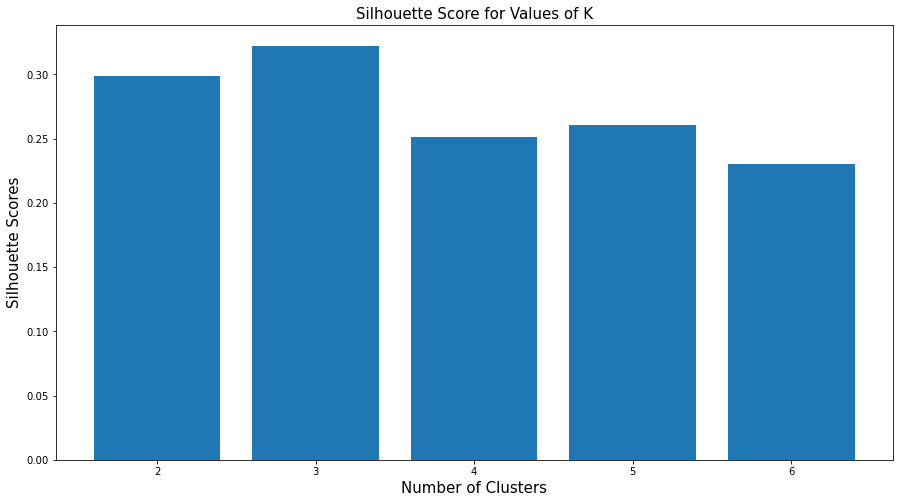

In [30]:
# consider different values of K
K = [2, 3, 4, 5, 6]

# consider an empty list tot store the silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    # use the 'ward' linkage method (same as the dendrogram)
    hierar_model = AgglomerativeClustering(n_clusters = i, linkage = 'ward') 
    
    # calculate the silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, hierar_model.fit_predict(features_scaled))) 
    
# plot the silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

In [31]:
# instantiate clustering method with 3 clusters and 'ward' linkage method
hierar_clusters = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

# fit the model on the scaled data
hierar_clusters.fit(features_scaled)

AgglomerativeClustering(n_clusters=3)

In [32]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
df_power['Hierar_label'] = hierar_clusters.labels_

# print head() of the dataframe
df_power.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                2.242                  0.162   237.33              10.0   
1                3.714                  0.296   235.15              15.8   
2                3.212                  0.304   235.99              14.2   
3                3.694                  0.280   235.16              15.6   
4                3.204                  0.292   236.08              14.0   

   Kitchen_consumption  Laundry_consumption  Other_appliances_consumption  \
0                    1                    7                            17   
1                    2                   35                            17   
2                    1                   26                            17   
3                    1                   35                            17   
4                    1                   27                            17   

   Kmeans_label  Hierar_label  
0             0             0  
1             2             1  
2             2             1  
3             2             1  
4             2             1

In [33]:
# use the 'value_counts()' to get the number of houses in each cluster
df_power['Hierar_label'].value_counts()

0    9025
2    4431
1    3268
Name: Hierar_label, dtype: int64

In [34]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Hierar_label == 0].describe()

Global_active_power  Global_reactive_power      Voltage  \
count          9025.000000            9025.000000  9025.000000   
mean              2.169233               0.243884   238.507899   
std               0.781089               0.127607     2.974284   
min               0.302000               0.046000   228.950000   
25%               1.568000               0.140000   236.700000   
50%               1.928000               0.226000   238.580000   
75%               2.640000               0.322000   240.450000   
max               6.106000               0.632000   246.120000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count       9025.000000          9025.000000          9025.000000   
mean           9.200953             2.204211             1.655180   
std            3.385530             3.950164             1.331098   
min            1.200000             1.000000             1.000000   
25%            6.600000             1.000000             1.000000   
50%            8.200000             1.000000             1.000000   
75%           11.200000             2.000000             2.000000   
max           26.000000            33.000000            20.000000   

       Other_appliances_consumption  Kmeans_label  Hierar_label  
count                   9025.000000   9025.000000        9025.0  
mean                      17.604765      0.059834           0.0  
std                        0.677592      0.245005           0.0  
min                       16.000000      0.000000           0.0  
25%                       17.000000      0.000000           0.0  
50%                       18.000000      0.000000           0.0  
75%                       18.000000      0.000000           0.0  
max                       19.000000      2.000000           0.0

In [35]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Hierar_label == 1].describe()

Global_active_power  Global_reactive_power      Voltage  \
count          3268.000000            3268.000000  3268.000000   
mean              4.580390               0.242856   235.935382   
std               1.370074               0.130985     3.369269   
min               1.562000               0.046000   228.600000   
25%               3.422000               0.136000   233.510000   
50%               4.450000               0.228000   235.950000   
75%               5.684000               0.316000   238.220000   
max               7.716000               0.626000   246.150000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count       3268.000000          3268.000000          3268.000000   
mean          19.597858            11.941860            27.849143   
std            5.894014            15.817746             7.038976   
min            6.600000             1.000000             8.000000   
25%           14.600000             1.000000            22.000000   
50%           19.000000             1.000000            29.000000   
75%           24.200000            35.000000            35.000000   
max           33.000000            40.000000            36.000000   

       Other_appliances_consumption  Kmeans_label  Hierar_label  
count                   3268.000000   3268.000000        3268.0  
mean                      17.191554      1.631273           1.0  
std                        0.681669      0.745702           0.0  
min                       16.000000      0.000000           1.0  
25%                       17.000000      2.000000           1.0  
50%                       17.000000      2.000000           1.0  
75%                       18.000000      2.000000           1.0  
max                       19.000000      2.000000           1.0

<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are 3268 houses in this cluster, which makes this the smallest cluster. Here the houses that have the highest average consumption of the laundry room appliances are grouped. We can see that 50% of the houses have kitchen appliances that consume only 1 watt-hour power. The global active power is between 1.56 to 7.7 KW. On average, the other appliances in these houses are consuming 17 watt-hours of power. The average intensity of the current is the highest for the houses in this cluster. <br><br> 75% of the observations in this cluster are grouped into the smallest cluster (cluster with label '0') of the K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Hierar_label == 2].describe()

Global_active_power  Global_reactive_power      Voltage  \
count          4431.000000            4431.000000  4431.000000   
mean              4.271862               0.265478   236.040934   
std               0.725525               0.140527     2.920575   
min               2.456000               0.046000   228.620000   
25%               3.742000               0.160000   234.210000   
50%               4.068000               0.246000   236.270000   
75%               4.685000               0.364000   237.965000   
max               7.698000               0.632000   245.170000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count       4431.000000          4431.000000          4431.000000   
mean          18.141954            36.342586             1.762582   
std            3.126222             3.731507             1.970335   
min           11.600000             1.000000             1.000000   
25%           15.800000            36.000000             1.000000   
50%           17.200000            37.000000             1.000000   
75%           19.800000            38.000000             2.000000   
max           32.800000            40.000000            27.000000   

       Other_appliances_consumption  Kmeans_label  Hierar_label  
count                   4431.000000    4431.00000        4431.0  
mean                      17.243963       1.00316           2.0  
std                        0.678811       0.08755           0.0  
min                       16.000000       0.00000           2.0  
25%                       17.000000       1.00000           2.0  
50%                       17.000000       1.00000           2.0  
75%                       18.000000       1.00000           2.0  
max                       19.000000       2.00000           2.0

In [37]:
# consider the array of euclidean distnce between the scaled data points
# the 'euclidean_distances()' returns the distance matrix which is symmetric
# consider only the upper-triangular elements, 'k=1' drops the diagonal elements
dist_array = euclidean_distances(features_scaled)[np.triu_indices(16724, k = 1)]

# calculate the minimum euclidean distance between the data points 
print('Minimum Distance:', dist_array.min())

# calculate the maximum euclidean distance between the data points 
print('Maximum Distance:', dist_array.max())

Minimum Distance: 0.001384947609371129
Maximum Distance: 10.179949808197904


In [38]:
# instantiate DBSCAN with epsilon and minimum points 
# pass the epsilon value as 1.4
# pass the number of minimum points as 4
dbscan_model = DBSCAN(eps = 1.4, min_samples = 4)

# fit the model on the scaled data
dbscan_model.fit(features_scaled)

DBSCAN(eps=1.4, min_samples=4)

#### Check the number of clusters formed by DBSCAN.

In [39]:
# display the labels of unique clusters formed by DBSCAN
(set(dbscan_model.labels_))

{-1, 0, 1, 2, 3}

In [40]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
df_power['DBSCSAN_label'] = dbscan_model.labels_

# print head() of the dataframe
df_power.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                2.242                  0.162   237.33              10.0   
1                3.714                  0.296   235.15              15.8   
2                3.212                  0.304   235.99              14.2   
3                3.694                  0.280   235.16              15.6   
4                3.204                  0.292   236.08              14.0   

   Kitchen_consumption  Laundry_consumption  Other_appliances_consumption  \
0                    1                    7                            17   
1                    2                   35                            17   
2                    1                   26                            17   
3                    1                   35                            17   
4                    1                   27                            17   

   Kmeans_label  Hierar_label  DBSCSAN_label  
0             0             0              0  
1             2             1              0  
2             2             1              0  
3             2             1              0  
4             2             1              0

#### Check the number of houses in each cluster.

In [41]:
# use the 'value_counts()' to get the number of houses in each cluster
df_power['DBSCSAN_label'].value_counts()

 0    7559
 2    7048
 1    1367
 3     739
-1      11
Name: DBSCSAN_label, dtype: int64

In [42]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.DBSCSAN_label == 0].describe()

Global_active_power  Global_reactive_power      Voltage  \
count          7559.000000            7559.000000  7559.000000   
mean              3.523585               0.247291   236.095989   
std               1.450244               0.133015     2.388117   
min               1.206000               0.046000   228.620000   
25%               2.279000               0.142000   234.510000   
50%               3.576000               0.226000   236.230000   
75%               4.467000               0.328000   237.780000   
max               7.716000               0.628000   243.630000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count       7559.000000          7559.000000          7559.000000   
mean          15.028416            15.279799             7.921683   
std            6.211325            16.969078            11.859132   
min            5.200000             1.000000             1.000000   
25%            9.800000             1.000000             1.000000   
50%           15.200000             2.000000             2.000000   
75%           19.000000            37.000000             6.000000   
max           33.000000            40.000000            36.000000   

       Other_appliances_consumption  Kmeans_label  Hierar_label  DBSCSAN_label  
count                        7559.0   7559.000000   7559.000000         7559.0  
mean                           17.0      0.777087      0.847467            0.0  
std                             0.0      0.765023      0.862246            0.0  
min                            17.0      0.000000      0.000000            0.0  
25%                            17.0      0.000000      0.000000            0.0  
50%                            17.0      1.000000      1.000000            0.0  
75%                            17.0      1.000000      2.000000            0.0  
max                            17.0      2.000000      2.000000            0.0

In [43]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.DBSCSAN_label == 1].describe()

Global_active_power  Global_reactive_power      Voltage  \
count          1367.000000            1367.000000  1367.000000   
mean              4.135503               0.269731   232.202019   
std               1.680468               0.141995     2.365954   
min               0.302000               0.046000   228.600000   
25%               3.069000               0.150000   230.595000   
50%               4.038000               0.254000   231.970000   
75%               5.421000               0.376000   233.315000   
max               7.690000               0.628000   244.100000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count       1367.000000          1367.000000          1367.000000   
mean          17.943087            19.117776            11.824433   
std            7.245056            16.689614            14.300935   
min            1.200000             1.000000             1.000000   
25%           13.600000             1.000000             1.000000   
50%           17.400000            23.000000             2.000000   
75%           23.500000            36.000000            28.000000   
max           33.000000            39.000000            36.000000   

       Other_appliances_consumption  Kmeans_label  Hierar_label  DBSCSAN_label  
count                        1367.0   1367.000000   1367.000000         1367.0  
mean                           16.0      1.159473      1.136064            1.0  
std                             0.0      0.724612      0.802947            0.0  
min                            16.0      0.000000      0.000000            1.0  
25%                            16.0      1.000000      0.000000            1.0  
50%                            16.0      1.000000      1.000000            1.0  
75%                            16.0      2.000000      2.000000            1.0  
max                            16.0      2.000000      2.000000            1.0

<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are 1367 houses in this cluster. Here the houses in which the other appliances consume 16 watt-hours of power are grouped.<br> Also, the kitchen appliances consume the highest power in these houses. We can see that 50% of the houses have laundry room appliances that consume 2 watt-hours of power. The average intensity of the current is approximately 18 ampere for these houses, which is the highest intensity.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.DBSCSAN_label == 2].describe()

Global_active_power  Global_reactive_power      Voltage  \
count          7048.000000            7048.000000  7048.000000   
mean              2.766352               0.246872   239.237518   
std               1.219763               0.129326     2.355326   
min               0.406000               0.046000   230.910000   
25%               1.690000               0.144000   237.600000   
50%               2.459000               0.228000   239.060000   
75%               3.718000               0.324000   240.840000   
max               7.678000               0.632000   246.080000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count       7048.000000          7048.000000          7048.000000   
mean          11.674574            10.591373             5.030931   
std            5.171662            15.393173             8.853676   
min            1.600000             1.000000             1.000000   
25%            7.200000             1.000000             1.000000   
50%           10.400000             1.000000             1.000000   
75%           15.600000            21.000000             2.000000   
max           33.000000            40.000000            36.000000   

       Other_appliances_consumption  Kmeans_label  Hierar_label  DBSCSAN_label  
count                        7048.0   7048.000000   7048.000000         7048.0  
mean                           18.0      0.392594      0.565409            2.0  
std                             0.0      0.634236      0.818566            0.0  
min                            18.0      0.000000      0.000000            2.0  
25%                            18.0      0.000000      0.000000            2.0  
50%                            18.0      0.000000      0.000000            2.0  
75%                            18.0      1.000000      1.000000            2.0  
max                            18.0      2.000000      2.000000            2.0

In [45]:
# get summary for observations identified as outliers
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.DBSCSAN_label == 3].describe()

Global_active_power  Global_reactive_power     Voltage  \
count           739.000000             739.000000  739.000000   
mean              2.201873               0.257169  241.735846   
std               0.804477               0.127483    2.185430   
min               1.354000               0.046000  234.600000   
25%               1.632000               0.155000  240.045000   
50%               1.892000               0.242000  241.460000   
75%               2.463000               0.346000  243.505000   
max               5.932000               0.630000  246.150000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count        739.000000           739.000000           739.000000   
mean           9.199729             4.680650             2.929635   
std            3.390462            10.224223             5.374629   
min            5.600000             1.000000             1.000000   
25%            6.800000             1.000000             1.000000   
50%            8.000000             1.000000             1.000000   
75%           10.400000             2.000000             2.000000   
max           24.800000            40.000000            35.000000   

       Other_appliances_consumption  Kmeans_label  Hierar_label  DBSCSAN_label  
count                         739.0    739.000000    739.000000          739.0  
mean                           19.0      0.104195      0.235453            3.0  
std                             0.0      0.343300      0.597001            0.0  
min                            19.0      0.000000      0.000000            3.0  
25%                            19.0      0.000000      0.000000            3.0  
50%                            19.0      0.000000      0.000000            3.0  
75%                            19.0      0.000000      0.000000            3.0  
max                            19.0      2.000000      2.000000            3.0

In [46]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.DBSCSAN_label == -1].describe()

Global_active_power  Global_reactive_power     Voltage  \
count            11.000000              11.000000   11.000000   
mean              5.656182               0.276727  237.221818   
std               2.120017               0.147976    3.567365   
min               1.786000               0.068000  231.610000   
25%               3.853000               0.197000  234.320000   
50%               6.088000               0.222000  237.610000   
75%               7.447000               0.326000  239.650000   
max               7.698000               0.582000  243.010000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count         11.000000            11.000000            11.000000   
mean          23.854545            19.272727             8.363636   
std            8.841308            17.595971            10.547727   
min            7.800000             1.000000             1.000000   
25%           16.400000             1.500000             1.000000   
50%           26.000000            23.000000             2.000000   
75%           31.400000            36.500000            15.500000   
max           32.400000            38.000000            30.000000   

       Other_appliances_consumption  Kmeans_label  Hierar_label  DBSCSAN_label  
count                     11.000000     11.000000     11.000000           11.0  
mean                      17.545455      1.181818      1.090909           -1.0  
std                        1.128152      0.750757      0.831209            0.0  
min                       16.000000      0.000000      0.000000           -1.0  
25%                       16.500000      1.000000      0.500000           -1.0  
50%                       18.000000      1.000000      1.000000           -1.0  
75%                       18.000000      2.000000      2.000000           -1.0  
max                       19.000000      2.000000      2.000000           -1.0

In [47]:
# consider 'n_components=2' to get the two principal components 
# pass the 'random_state' to get the same output for multiple runs
pca_2 = PCA(n_components = 2, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca_2.fit_transform(features_scaled)

# create a dataframe of the principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC1','PC2'])
# head() to display top five rows of the transformed data
df_pca.head()

PC1       PC2
0 -0.763029 -1.185006
1  1.332327 -0.954525
2  0.671425 -0.893091
3  1.274939 -1.027622
4  0.659776 -0.928053

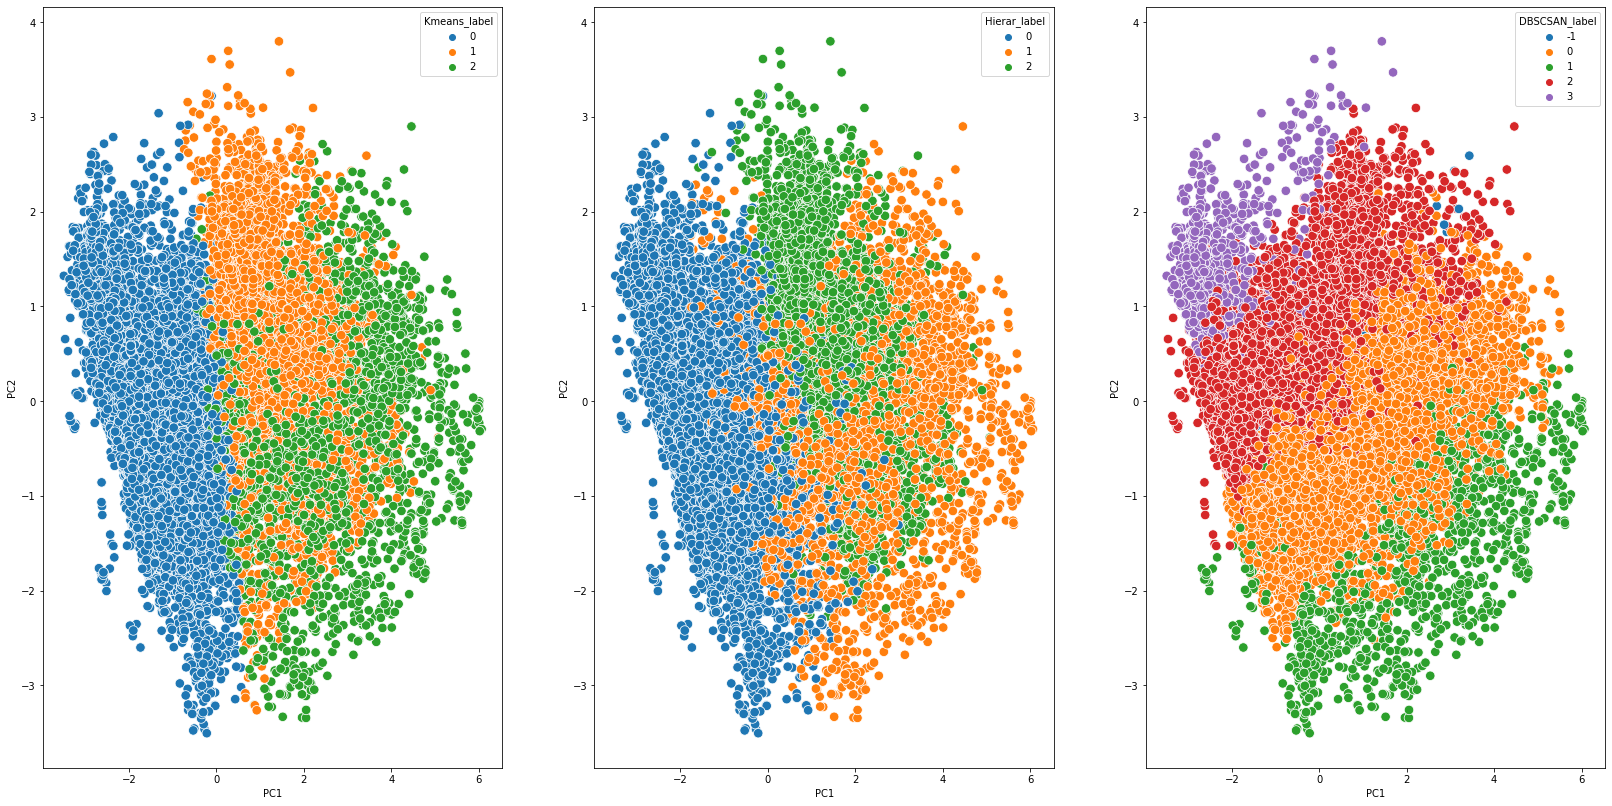

In [48]:
# set the plot size
plt.figure(figsize = (28, 14))

# plot a scatterplot to visualize the clusters
# pass the 1st and 2nd principal component to the parameter 'x' and 'y' respectively
# pass the dataframe of PCA components to the parameter 'data'
# pass the size of the data points to the parameter 's'
# pass the cluster labels to the parameter 'hue' to display the clusters with different colors
# pass the required colors to the parameter 'palette'

# plot the first subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,1)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df_power['Kmeans_label'], palette = 'tab10')

# plot the second subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,2)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df_power['Hierar_label'], palette = 'tab10')

# plot the third subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,3)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df_power['DBSCSAN_label'], palette = 'tab10')

# display the plot
plt.show()